## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Feature Learning - Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

np.random.seed(0)

plt.style.use("ggplot")

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.datasets import make_circles

In [3]:
wine_data = load_wine()

In [4]:
wine_features = pd.DataFrame(wine_data["data"], columns=wine_data["feature_names"])
wine_targets = pd.DataFrame(wine_data["target"], columns=["class"])
print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
wine_features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine_targets.head()

,class
0,0
1,0
2,0
3,0
4,0


In [8]:
wine_targets["class"].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_targets, test_size=0.2, random_state=0)

With the wine data, we will apply [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to 2 components to be able to visualize the data and then run a linear regression on the original data as well as PCA and compare their performances.

In [10]:
# Set pca_tf to the PCA transformer using 2 components (case matters)
# Fit and transform X_train and save to X_train_pca
# Transform X_test and save to X_test (**should say X_test_pca here**)
# YOUR CODE HERE
pca_tf = sk.decomposition.PCA(n_components=2)
pca_tf.fit(X_train, y_train)
X_train_pca = pca_tf.transform(X_train)
X_test_pca = pca_tf.transform(X_test)

In [11]:
assert pca_tf
assert X_train_pca.shape == (142, 2)
assert X_test_pca.shape == (36,2)

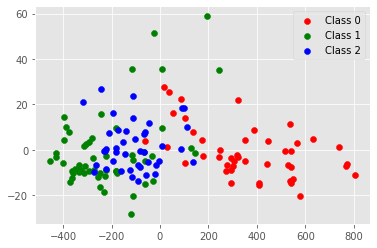

In [12]:
c0 = plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 0], X_train_pca[:,1].reshape(-1,1)[y_train == 0], color="r")
c1 = plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 1], X_train_pca[:,1].reshape(-1,1)[y_train == 1], color="g")
c2 = plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 2], X_train_pca[:,1].reshape(-1,1)[y_train == 2], color="b")
plt.legend((c0, c1, c2), ("Class 0", "Class 1", "Class 2"))
plt.show()

In [13]:
# Fit 2 linear svm classifiers, lm and lm_pca on the X_train and X_train_pca data respectively.
# YOUR CODE HERE
lm = sk.svm.LinearSVC().fit(X_train, y_train)
lm_pca = sk.svm.LinearSVC().fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [14]:
assert lm
assert isinstance(lm, LinearSVC)
assert lm.coef_.shape == (3, 13)
assert lm_pca
assert isinstance(lm_pca, LinearSVC)
assert lm_pca.coef_.shape == (3, 2)

In [15]:
print(f"The f1 weighted score using LM is {f1_score(y_test, lm.predict(X_test), average='weighted')}.")
print(f"The f1_weighted score using LM PCA is {f1_score(y_test, lm_pca.predict(X_test_pca), average='weighted')}.")

The f1 weighted score using LM is 0.8250152625152626.
The f1_weighted score using LM PCA is 0.4979423868312758.


PCA can help us visualize the data but it can come at a cost when we apply a machine learning model to its components. Often, the results are still worth the reduction in computation time when we have extremely large datasets. And sometimes we may achieve better results with PCA because it may remove noise in the data.

Another important aspect that we covered about PCA is that it minimizes the reconstruction error. One key useful attribute of PCA is we can transform the data and then transform it back. Let's walk through that. In scikit-learn we can reverse a transformation by running `.inverse_transform()` whenever it's available.

In [16]:
original_data = X_train
transformed_then_inverse_transformed_data = pca_tf.inverse_transform(X_train_pca)

print(original_data.shape, transformed_then_inverse_transformed_data.shape)

(142, 13) (142, 13)


In [17]:
reconstruction_error = mean_squared_error(original_data, transformed_then_inverse_transformed_data)
print(reconstruction_error)

1.3868575432660468


What happens when we use more components? Do you expect the reconstruction error to increase or decrease? Try it out!

## Kernel PCA

In [18]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1

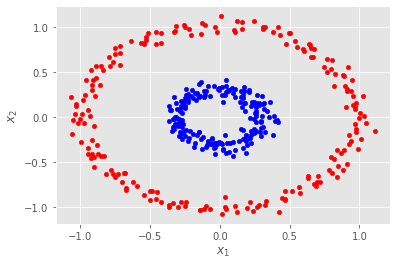

In [19]:
plt.scatter(X[reds, 0], X[reds, 1], c="r", s=20)
plt.scatter(X[blues, 0], X[blues, 1], c="b", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [20]:
# Apply a PCA transformation on X with 2 components
# Save the PCA transformer to pca_tf
# Save the transformed values of X to X_pca

# YOUR CODE HERE
pca_tf = sk.decomposition.PCA(n_components=2)
pca_tf.fit(X, y)
X_pca = pca_tf.transform(X)

In [21]:
assert pca_tf
assert X_pca.shape == (400,2)

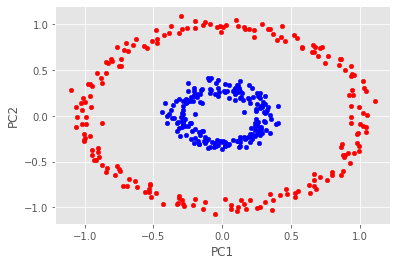

In [22]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="r", s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="b", s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can see that there isn't much value in using traditional PCA. Let's try [kernel PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA). We'll use the RBF kernel and a gamma of 10. Also, set `fit_inverse_transform=True`.

In [23]:
# Apply a Kernel PCA transformation on X with 2 components
# Save the Kernel PCA transformer to kpca_tf
# Save the transformed values of X to X_pca (**Should be X_kpca**)

# YOUR CODE HERE
kpca_tf = sk.decomposition.KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform = True)
kpca_tf.fit(X,y)
X_kpca = kpca_tf.transform(X)

In [24]:
assert kpca_tf
assert X_kpca.shape == (400,2)

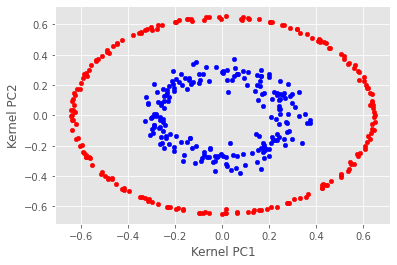

In [25]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="r", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="b", s=20)
plt.xlabel("Kernel PC1")
plt.ylabel("Kernel PC2")
plt.show()

In this next section we will run an inverse transformation on the Kernel PCA to try and bring it back to the original space. This is done by learning a _linear_ model since we can't really model the kernel exactly. Since our data heavily uses the non-linear patterns in the data, let's see how good/bad this inverse transformation is.

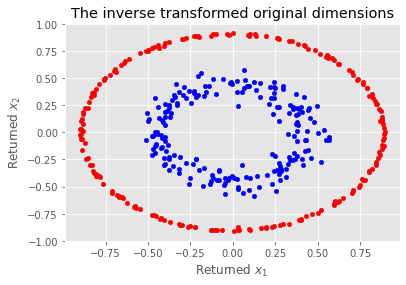

In [26]:
X_inverse = kpca_tf.inverse_transform(X_kpca)
plt.scatter(X_inverse[reds, 0], X_inverse[reds, 1], c="r", s=20)
plt.scatter(X_inverse[blues, 0], X_inverse[blues, 1], c="b", s=20)
plt.xlabel("Returned $x_1$ ")
plt.ylabel("Returned $x_2$")
plt.title("The inverse transformed original dimensions")
plt.show()

It is important to note that while one of PCA's goals is to minimize reconstruction error, that **doesn't mean that it is able to reduce it to 0.** Minimum possible does not necessarily mean 0. 

## Feedback

In [27]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    feedback = "There were a few typos in the comments specifically when specifying what to name our transformed X values to. These are at X_test_pca and X_kpca."
    return feedback

In [28]:
feedback()

'There were a few typos in the comments specifically when specifying what to name our transformed X values to. These are at X_test_pca and X_kpca.'